### Task 6 : Multi Task Learning

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import  fashion_mnist



In [ ]:
def load_data():
    (train_X, train_y_1),(test_X, test_y_1) = fashion_mnist.load_data()
    n_class_1 = 10


    train_y_2 = list(0 if y in [5,7,9] else 1 if y in [3,6,8] else 2 for y in train_y_1)
    test_y_2 = list(0 if y in [5,7,9] else 1 if y in [3,6,8] else 2 for y in test_y_1)
    n_class_2 =3

    print(f"Original shape of train_X = {train_X.shape},Original shape of test_X = {test_X.shape}")
    train_X = np.expand_dims(train_X, axis=3)
    test_X = np.expand_dims(test_X, axis=3)

    train_y_1 = to_categorical(train_y_1, n_class_1)
    test_y_1 = to_categorical(test_y_1, n_class_1)

    train_y_2 = to_categorical(train_y_2, n_class_2)
    test_y_2 = to_categorical(test_y_2, n_class_2)

    return train_X, train_y_1, train_y_2, test_X, test_y_1, test_y_2

In [ ]:
x_train, y_train_1, y_train_2, x_test, y_test_1, y_test_2 = load_data()

4422102/4422102 [==============================] - 1s 0us/step
Original shape of train_X = (60000, 28, 28),Original shape of test_X = (10000, 28, 28)


In [ ]:
print(f"x_train = {x_train.shape}, y_train_1 = {y_train_1.shape}, y_train_2 = {y_train_2.shape}, x_test = {x_test.shape}, y_test_1 = {y_test_1.shape}, y_test_2 = {y_test_2.shape}")

x_train = (60000, 28, 28, 1), y_train_1 = (60000, 10), y_train_2 = (60000, 3), x_test = (10000, 28, 28, 1), y_test_1 = (10000, 10), y_test_2 = (10000, 3)


### Task 6.1 : Construct 2 seperate CNNs

In [ ]:
#CNN_1

cnn_model_1 = Sequential([
    Conv2D(32, (3, 3), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2),strides=(1,1)),
    Conv2D(64, (3, 3), strides=(1, 1), activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=(1,1)),
    Conv2D(128, (3, 3), strides=(1, 1), activation='relu'),
    Flatten(),
    Dense(3136, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model_1.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#CNN_2
cnn_model_2 = Sequential([
    Conv2D(32, (3, 3), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2),strides=(1,1)),
    Conv2D(64, (3, 3), strides=(1, 1), activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=(1,1)),
    Conv2D(128, (3, 3), strides=(1, 1), activation='relu'),
    Flatten(),
    Dense(3136, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(100, activation='relu'),
    Dense(3, activation='softmax')
])

cnn_model_2.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


#Train the CNN_1 model
# Train the model
cnn_model_1_hist = cnn_model_1.fit(x_train, y_train_1, batch_size=100, epochs=5, validation_data=(x_test, y_test_1))

# Evaluate the model on training data
train_loss, train_accuracy = cnn_model_1.evaluate(x_train, y_train_1, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate the model on test data
test_loss, test_accuracy = cnn_model_1.evaluate(x_test, y_test_1, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


#Train CNN_2 model
cnn_model_2_hist = cnn_model_2.fit(x_train, y_train_2, batch_size=100, epochs=5, validation_data=(x_test, y_test_2))

# Evaluate the model on training data
train_loss, train_accuracy = cnn_model_2.evaluate(x_train, y_train_2, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate the model on test data
test_loss, test_accuracy = cnn_model_2.evaluate(x_test, y_test_2, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/5
600/600 [==============================] - 52s 66ms/step - loss: 4.3097 - accuracy: 0.8089 - val_loss: 0.4210 - val_accuracy: 0.8498
Epoch 2/5
600/600 [==============================] - 42s 69ms/step - loss: 0.3495 - accuracy: 0.8712 - val_loss: 0.3694 - val_accuracy: 0.8697
Epoch 3/5
600/600 [==============================] - 40s 67ms/step - loss: 0.2938 - accuracy: 0.8907 - val_loss: 0.3229 - val_accuracy: 0.8852
Epoch 4/5
600/600 [==============================] - 40s 67ms/step - loss: 0.2614 - accuracy: 0.9026 - val_loss: 0.3120 - val_accuracy: 0.8874
Epoch 5/5
600/600 [==============================] - 40s 66ms/step - loss: 0.2250 - accuracy: 0.9148 - val_loss: 0.3093 - val_accuracy: 0.8890
Training Accuracy: 93.30%
Test Accuracy: 88.90%
Epoch 1/5
600/600 [==============================] - 44s 70ms/step - loss: 3.6077 - accuracy: 0.8773 - val_loss: 0.2331 - val_accuracy: 0.8961
Epoch 2/5
600/600 [==============================] - 41s 68ms/step - loss: 0.1906 - accuracy: 

### Task : 6.2

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

# Input layer for the image data
input_layer = Input(shape=(28, 28, 1))  # Assuming input images are 28x28 grayscale

# Create 3 Shared Convolutional with MaxPooling after 1 and 2 layer
# conv1 : size=32 and kernel size = (3×3), stride=1
# MaxPooling : kernel Size=(2,2), stride=2
# conv2 : size=64 and kernel size = (3×3), stride=1
# MaxPooling : kernel Size=(2,2), stride=2
# conv3 : size=128 and kernel size = (3×3), stride=1

conv_1 = Conv2D(32, (3, 3), strides=1,activation='relu', padding='same')(input_layer)
pool_1 = MaxPooling2D(pool_size=(2, 2),strides=2)(conv_1)
conv_2 = Conv2D(64, (3, 3), strides=1,activation='relu', padding='same')(pool_1)
pool_2 = MaxPooling2D(pool_size=(2, 2),strides=1)(conv_2)
conv_3 = Conv2D(128, (3, 3), strides=1,activation='relu', padding='same')(pool_2)

# Flatten the output
flatten = Flatten()(conv_3)

# Shared Dense Layer
shared_dense = Dense(3136, activation='relu')(flatten)

# Task 1 Dense Layers
task1_dense1 = Dense(1024, activation='relu')(shared_dense)
task1_dense2 = Dense(100, activation='relu')(task1_dense1)
task1_output = Dense(10, activation='softmax', name='task1')(task1_dense2)

# Task 2 Dense Layers
task2_dense1 = Dense(1024, activation='relu')(shared_dense)
task2_dense2 = Dense(100, activation='relu')(task2_dense1)
task2_output = Dense(3, activation='softmax', name='task2')(task2_dense2)

# Define the model with multiple outputs
mtl_model = Model(inputs=input_layer, outputs=[task1_output, task2_output])

# Compile the model
mtl_model.compile(optimizer='adam',
              loss={'task1': 'categorical_crossentropy',
                    'task2': 'categorical_crossentropy'},
              metrics={'task1': 'accuracy', 'task2': 'accuracy'})

# Summary of the model
mtl_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 28, 28, 32)           320       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)           0         ['conv2d_6[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv2d_7 (Conv2D)           (None, 14, 14, 64)           18496     ['max_pooling2d_4[0][0]'] 

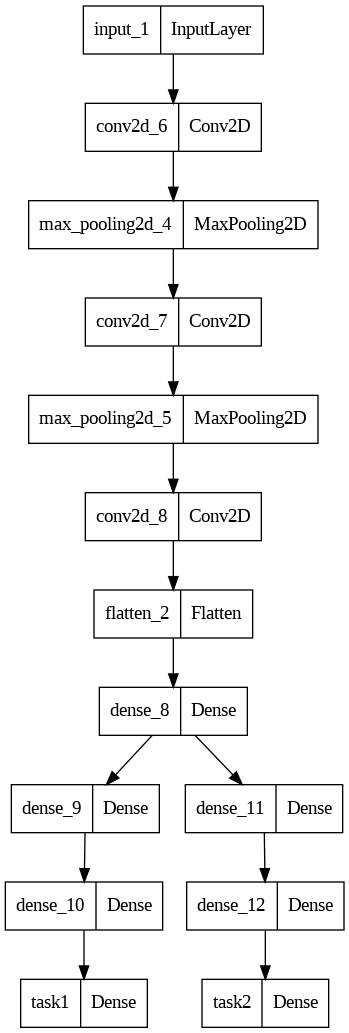

In [ ]:
tf.keras.utils.plot_model(mtl_model)

In [ ]:
# Train the MTL model for different values of lambda (λ)
lambda_values = [0.0, 0.25, 0.5, 0.75, 1.0]

results = []

for lambda_value in lambda_values:
    # Compile the model with updated loss weights based on lambda
    mtl_model.compile(optimizer='adam',
                  loss={'task1': 'categorical_crossentropy', 'task2': 'categorical_crossentropy'},
                  loss_weights={'task1': lambda_value, 'task2': 1.0 - lambda_value},
                  metrics={'task1': 'accuracy', 'task2': 'accuracy'})

    # Train the model
    history = mtl_model.fit(x_train, {'task1': y_train_1, 'task2': y_train_2},
                        validation_data=(x_test, {'task1': y_test_1, 'task2': y_test_2}),
                        epochs=10, batch_size=32, verbose=0)

    # Evaluate the model on the test data
    test_scores = mtl_model.evaluate(x_test, {'task1': y_test_1, 'task2': y_test_2}, verbose=0)
    test_accuracy_task1 = test_scores[3]  # Accuracy of Task 1
    test_accuracy_task2 = test_scores[4]  # Accuracy of Task 2

    results.append((lambda_value, test_accuracy_task1, test_accuracy_task2))

# Print the results in a table
print("Lambda | Task 1 Accuracy | Task 2 Accuracy")
for result in results:
    print(f"{result[0]:.2f}   | {result[1]*100:.2f}%           | {result[2]*100:.2f}%")


Lambda | Task 1 Accuracy | Task 2 Accuracy
0.00   | 6.48%           | 94.45%
0.25   | 90.25%           | 94.20%
0.50   | 89.77%           | 94.03%
0.75   | 90.31%           | 94.41%
1.00   | 90.21%           | 93.89%
